In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import sys
import os
from glob import glob
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages
from xarray import open_dataset

#import fs.move  # required by eopatch.save
from eolearn.core import EOPatch

In [2]:

def visualize_predictions_bas(eop, tidx=1, viz_factor=2.5):
    # tidx select one timestamp
    fig, axs = plt.subplots(figsize=(15, 5), ncols=3, sharey=True)
    axs[0].imshow(viz_factor * eop.data['BANDS'][tidx][..., [2, 1, 0]] / 10000)
    axs[0].set_title('RGB bands')
    axs[1].imshow(eop.data['EXTENT_PREDICTED'][tidx].squeeze(), vmin=0, vmax=1)
    axs[1].set_title('Extent')
    axs[2].imshow(eop.data['BOUNDARY_PREDICTED'][tidx].squeeze(), vmin=0, vmax=1)
    axs[2].set_title('Boundary');
    plt.show()


def visualize_predictions(eop, tidx=1, row_s=0, row_d=256,
                          col_s=0, col_d=256, viz_factor=3.5,
                          alpha=.2, axs=None):
    # tidx select one timestamp
    # EOPatch
    if axs is None:
        fig, axs = plt.subplots(figsize=(15, 10), ncols=3, sharey=True)
    axs[1].imshow(viz_factor * eop.data['BANDS'][tidx][row_s:row_d, col_s:col_d, [2, 1, 0]] / 10000)
    axs[1].set_title('RGB bands')
    axs[1].imshow(eop.data['EXTENT_PREDICTED'][tidx].squeeze()[row_s:row_d, col_s:col_d],
                  vmin=0, vmax=1, alpha=alpha)
    axs[1].set_title('Extent')
    
    axs[2].imshow(viz_factor * eop.data['BANDS'][tidx][row_s:row_d, col_s:col_d, [2, 1, 0]] / 10000)
    axs[2].set_title('RGB bands')
    axs[2].imshow(eop.data['BOUNDARY_PREDICTED'][tidx].squeeze()[row_s:row_d, col_s:col_d],
                  vmin=0, vmax=1, alpha=alpha)
    axs[2].set_title('Boundary')
    
    axs[0].imshow(viz_factor * eop.data['BANDS'][tidx][row_s:row_d, col_s:col_d, [2, 1, 0]] / 10000)
    axs[0].set_title('RGB bands')

def vis_scene_classification(scl, ax=None):
    # https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/scene-classification/
    classes = {
        0: [0, 0, 0],  # No Data (Missing data) - black
        1: [255, 0, 0],  # Saturated or defective pixel - red
        2: [47, 47, 47],
        # Topographic casted shadows ("Dark features/Shadows" for data before 2022-01-25) - very dark grey
        3: [100, 50, 0],  # Cloud shadows - dark brown
        4: [0, 160, 0],  # Vegetation - green
        5: [255, 230, 90],  # Not-vegetated - dark yellow
        6: [0, 0, 255],  # Water (dark and bright) - blue
        7: [128, 128, 128],  # Unclassified - dark grey
        8: [192, 192, 192],  # Cloud medium probability - grey
        9: [255, 255, 255],  # Cloud high probability - white
        10: [100, 200, 255],  # Thin cirrus - very bright blue
        11: [255, 150, 255],  # Snow or ice - very bright pink
    }
    label_names = [
        "No Data",
        "Saturated",
        "Topographic casted shadows",
        "Cloud shadows",
        "Vegetation",
        "Not-vegetated",
        "Water",
        "Unclassified",
        "Cloud medium probability",
        "Cloud high probability",
        "Thin cirrus",
        "Snow or ice",
    ]
    color_map_a = np.array(list(classes.values()), dtype=float)
    color_map_a /= 255.
    cmap = ListedColormap(colors=color_map_a, name='scene_cls', N=len(color_map_a))

    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].matshow(scl.astype(int), vmin=0,
                vmax=11, cmap=cmap)
    ax[0].set_title('Scene Classification S2 L2A')
    # https://github.com/VSainteuf/utae-paps/blob/main/Visualisations.ipynb
    # Class Labels
    ax[1].matshow(np.stack([np.arange(0, len(color_map_a)) for _ in range(3)], axis=1), cmap=cmap)
    ax[1].set_yticks(ticks=range(len(color_map_a)), labels=label_names)
    ax[1].set_xticks(ticks=[])
    #plt.show()

def visualize_sc_cls_patch(patch, viz_factor=3.5):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    vis_scene_classification(patch.scl.values[0], ax)
    ax[2].imshow(viz_factor * np.stack([patch.B4.values, patch.B3.values, patch.B2.values], axis=-1).squeeze() / 10000)
    ax[2].set_title('RGB bands')
    plt.show()

In [3]:
# change to your own paths 
TILE_ID = "S2B_31TEN_20230420_0_L2A" #"S2A_30UWU_20230302_0_L2A" # "S2A_31UGR_20240406_0_L2A"
eop_dir = f"/{TILE_ID}/eopatches/"

In [4]:
eopatches = [f.path for f in os.scandir(
         eop_dir) if f.is_dir() and f.name.startswith('eopatch')]
len(eopatches)

181

C:\Users\alena.bakhoryna\AppData\Local\anaconda3\envs\nivaenv\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


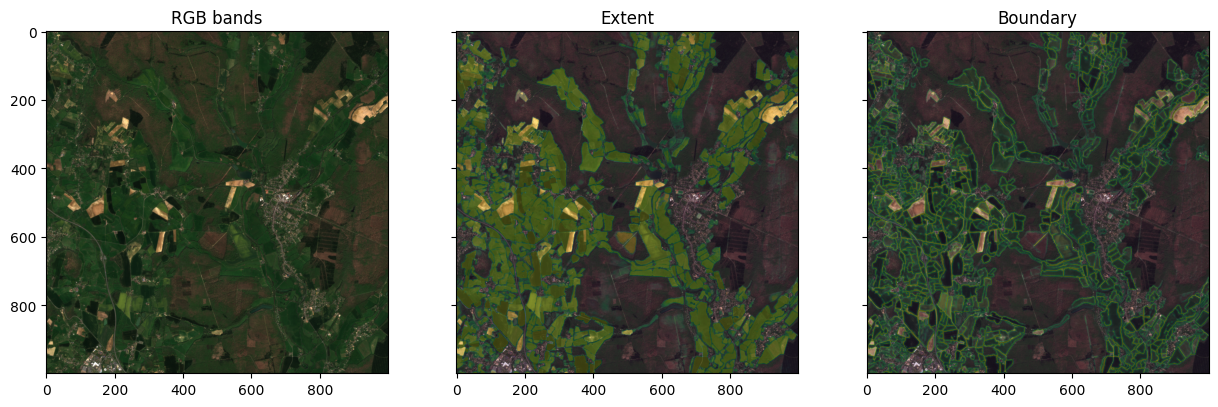

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


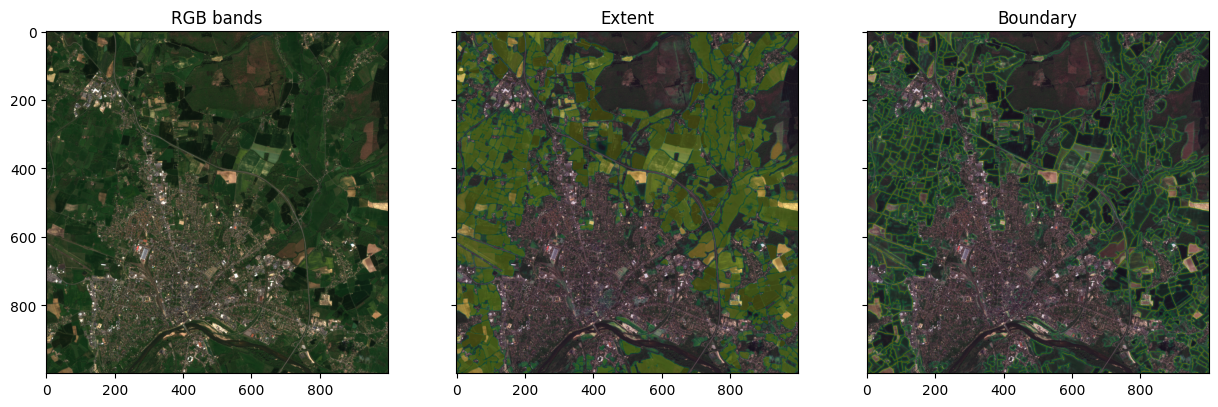

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


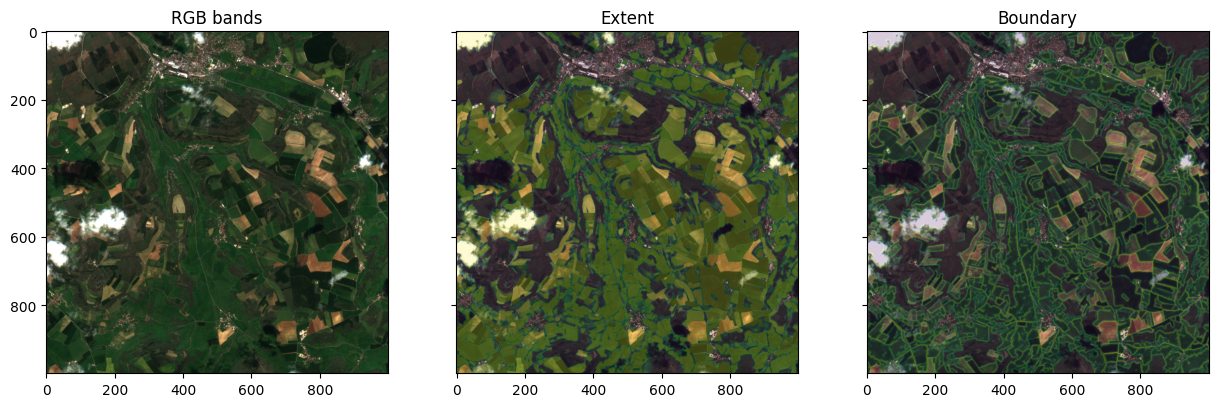

In [8]:
for eopatch_path in np.random.choice(eopatches, 3, replace=False):  # prediction visualization
    eop = EOPatch.load(eopatch_path)
    visualize_predictions(eop, tidx=0, row_s=0, row_d=1000,
                          col_s=0, col_d=1000, viz_factor=3.5,
                          alpha=.2, axs=None)
    plt.show()

In [9]:
TILE_ID = "S2A_30UWU_20230302_0_L2A"
nc_path = f"{TILE_ID}/tile/{TILE_ID}.nc"

In [10]:
ds = open_dataset(nc_path, decode_coords="all")  # decode all needed to load crs

In [11]:
def check_good_patch(patch, bad_percentage=0.70, vgt_percentage=0.1,
                     cld_percentage=0.3):
    # https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/scene-classification/
    shape_all = patch.scl.shape[-1] * patch.scl.shape[-2]
    cld_data_count, bad_data_count = 0, 0
    cld_data_count += (patch.scl == 9).sum()  # Cloud high probability
    bad_data_count += cld_data_count.values
    bad_data_count += (patch.scl == 11).sum()  # Snow or ice
    bad_data_count += (patch.scl == 0).sum()  # No Data (Missing data)
    bad_data_count += (patch.scl == 1).sum()  # Saturated or defective pixel
    bad_data_count += (patch.scl == 5).sum()  # Not-vegetated
    bad_data_count += (patch.scl == 6).sum()  # Water

    #cld_data_count += (patch.scl == 3).sum()  # Cloud shadows
    cld_data_count += (patch.scl == 8).sum()  # Cloud medium probability
    #cld_data_count += (patch.scl == 10).sum()  # Thin cirrus
    # vegetation (possible crop fields). Problem - could be under the clouds / cloud shadows ... -> another class
    vegetation_prec = (patch.scl == 4).sum().values / shape_all  # Vegetation
    curr_bad_percentage = bad_data_count.values / shape_all
    curr_cld_percentage = cld_data_count.values / shape_all
    print(vegetation_prec, curr_bad_percentage, curr_cld_percentage)
    flag_good = (curr_cld_percentage < cld_percentage) & ((curr_bad_percentage < bad_percentage) | (vegetation_prec > vgt_percentage))
    # True - good patch, False - bad
    return flag_good

In [12]:
import itertools as it

width, height = 1000, 1000
W, H = len(ds.x), len(ds.y)
begin_x, begin_y, overlap = 0, 0, 100
x_rng = range(begin_x, W - width + 1, width - overlap)
y_rng = range(begin_y, H - height + 1, height - overlap)

xy_index = list(it.product(x_rng, y_rng))

In [15]:
len(xy_index)

144

0.004772 0.715156 0.935184


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


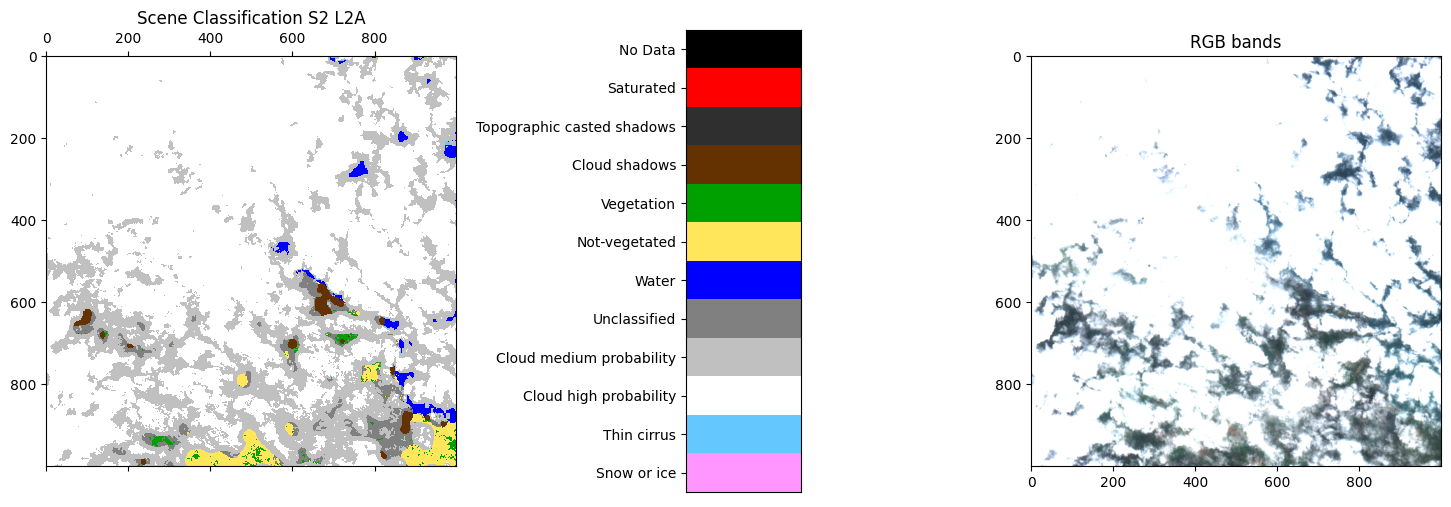

0.0553 0.578564 0.699836


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


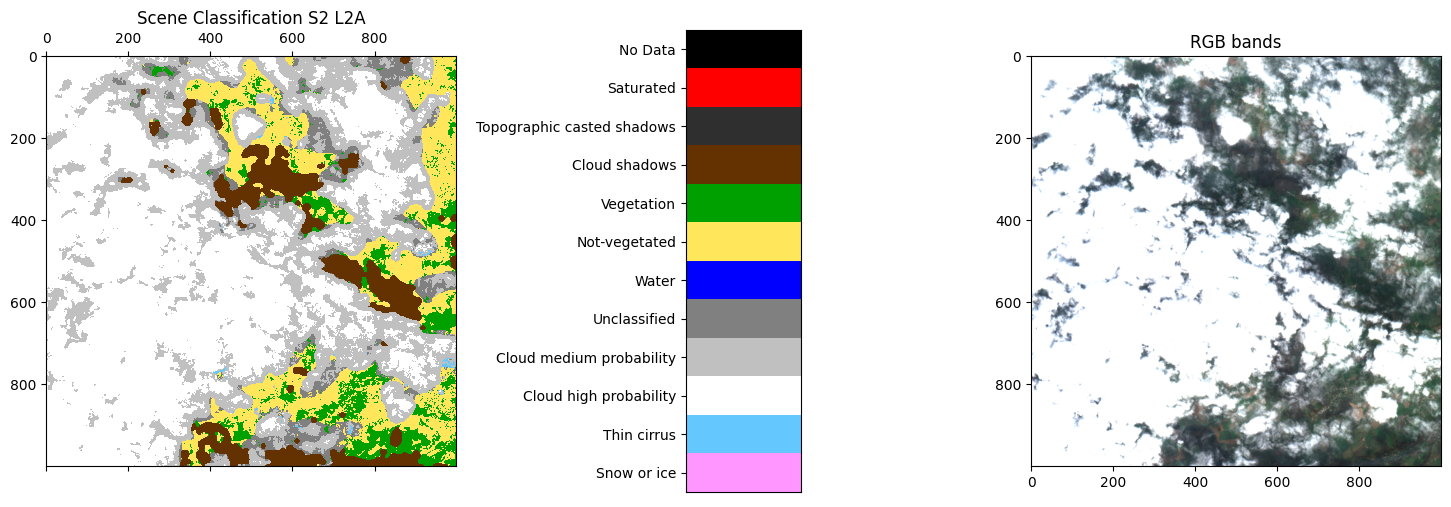

0.018408 0.731476 0.86386


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


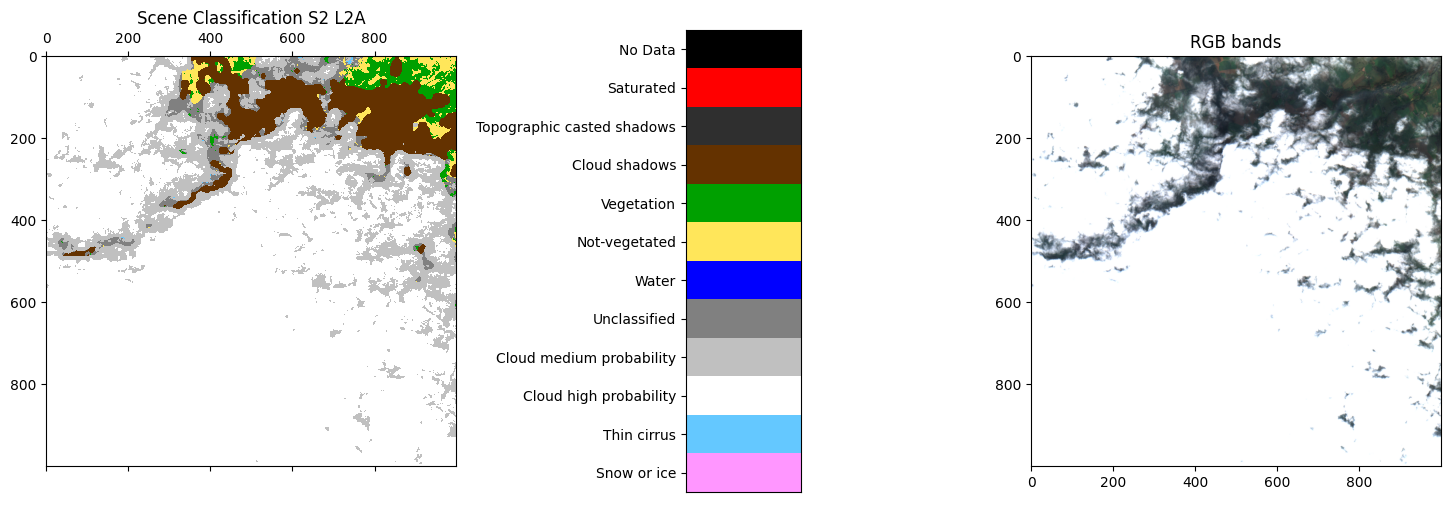

0.003608 0.847092 0.95966


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


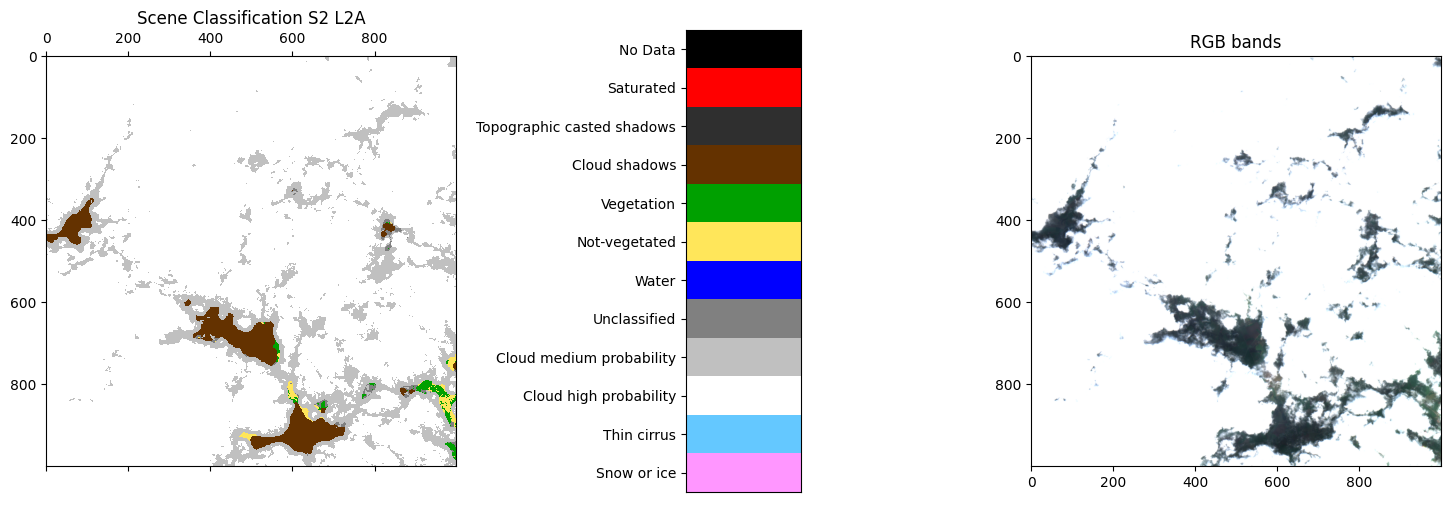

0.0224 0.618424 0.809416


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


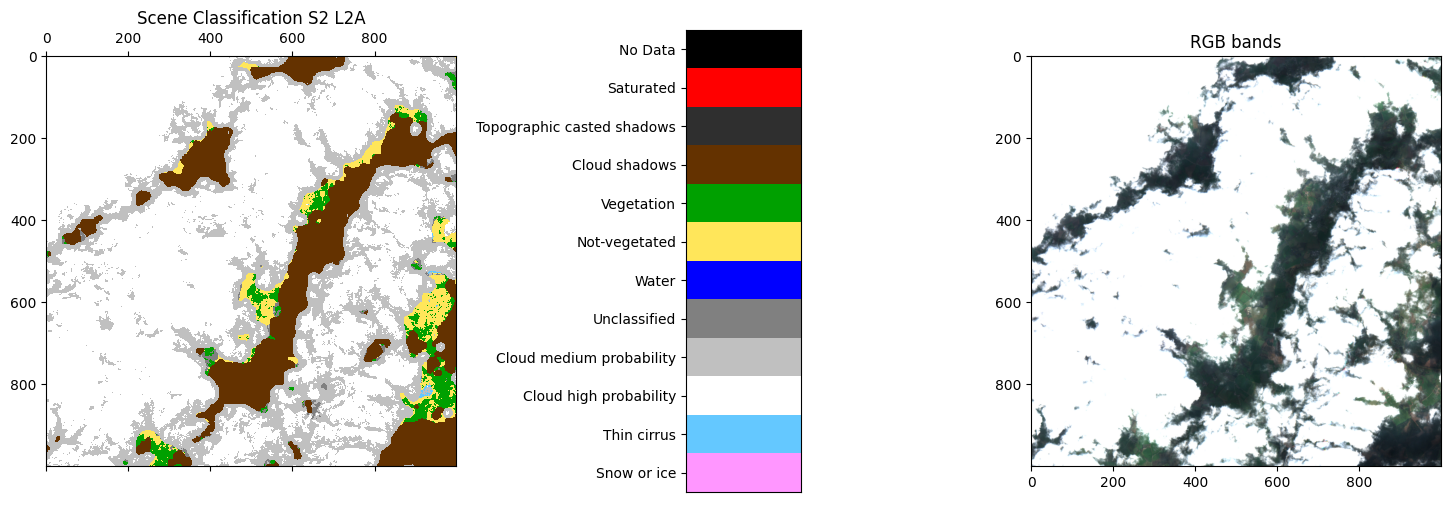

0.089152 0.435768 0.706116


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


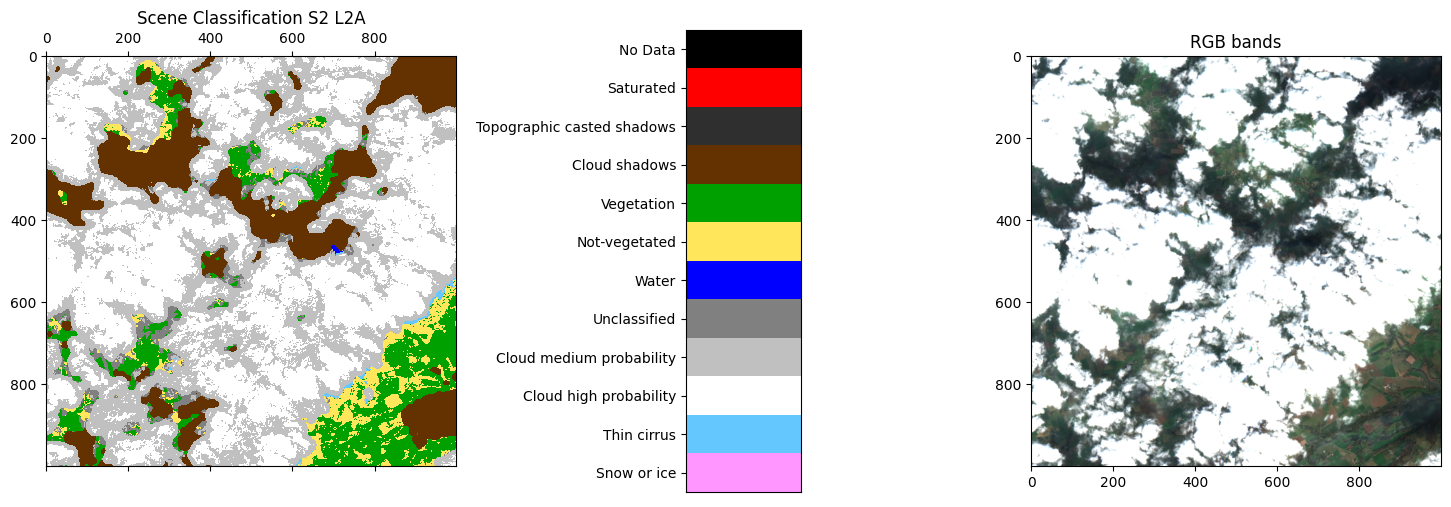

0.269468 0.249912 0.436176


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


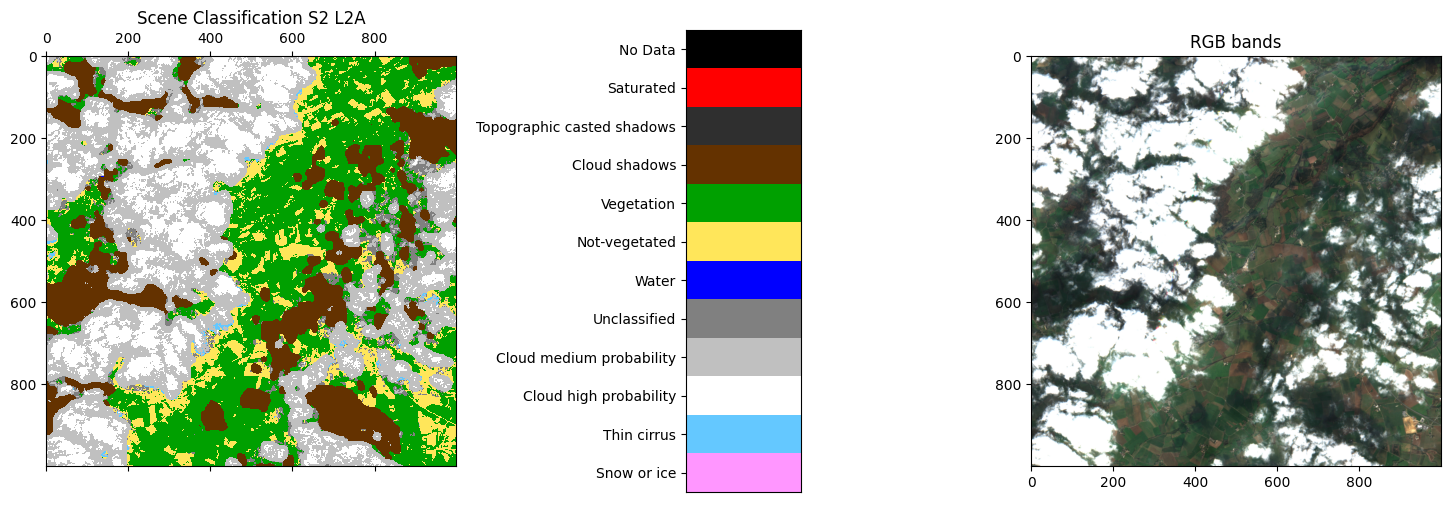

0.203908 0.28596 0.43996


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


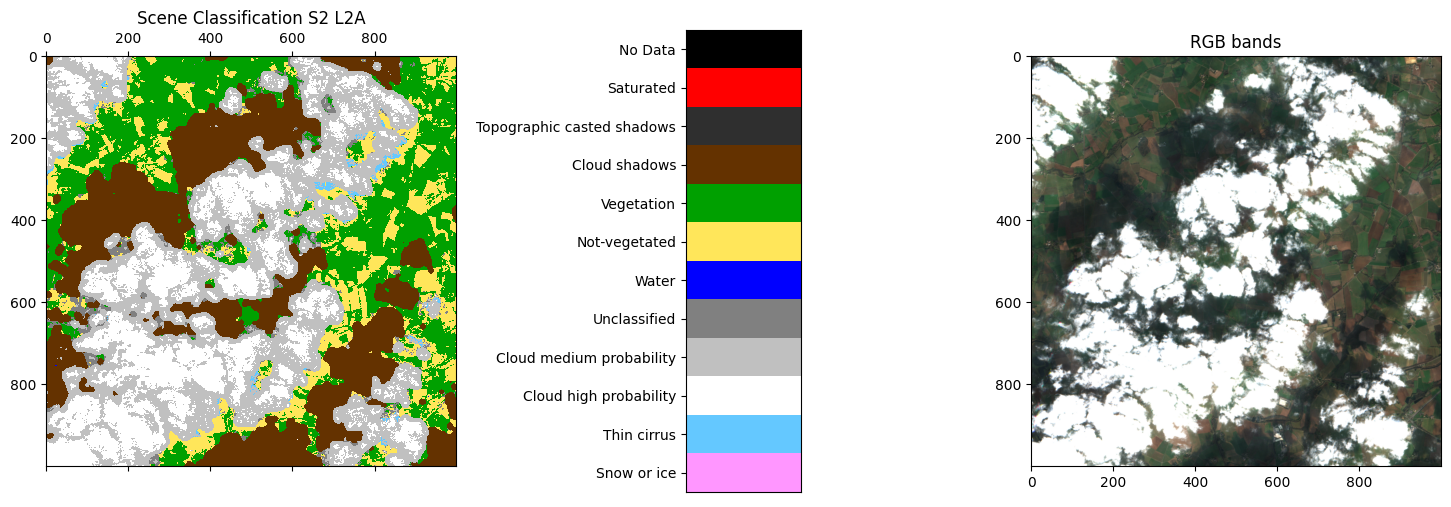

0.115912 0.302292 0.46718


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


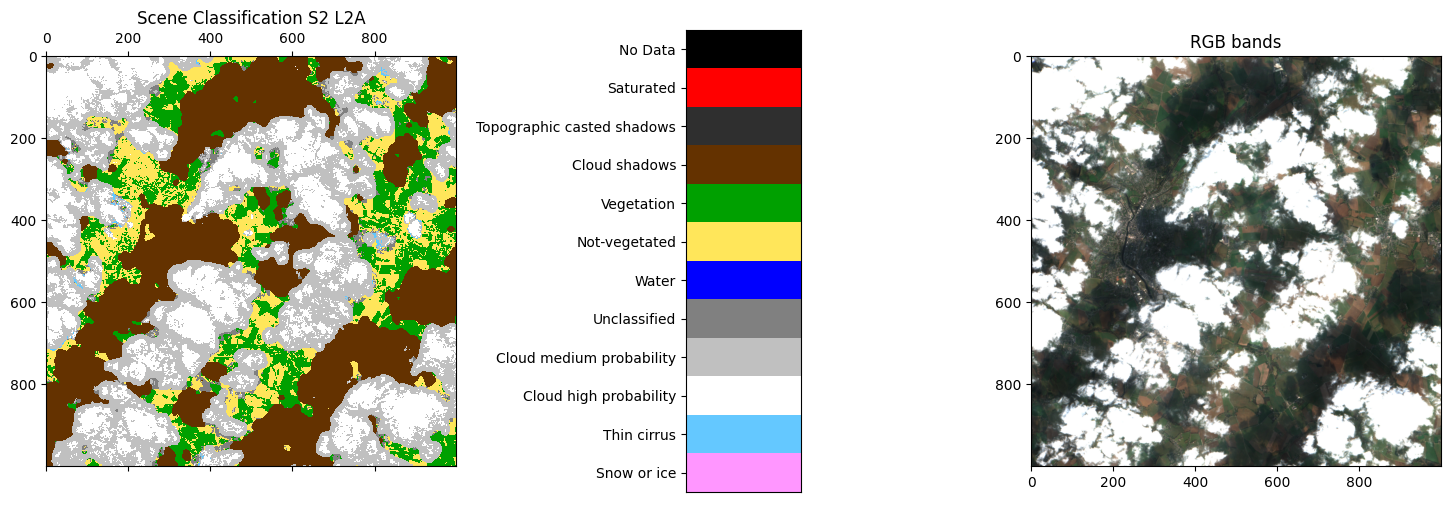

0.229788 0.330572 0.3983


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


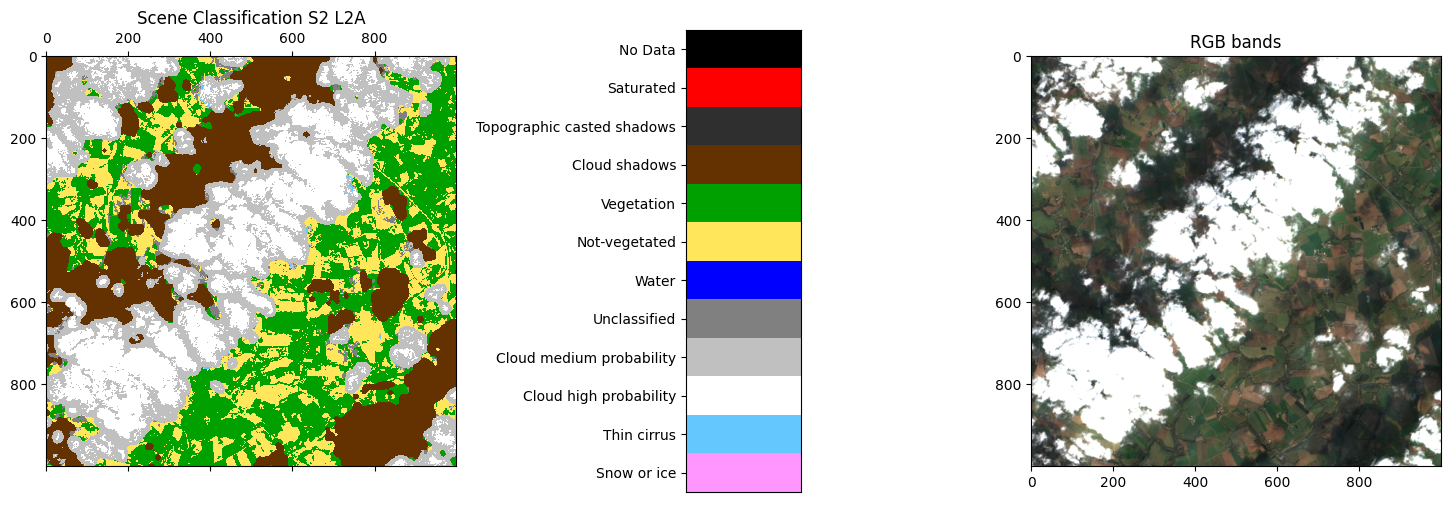

10


In [14]:
count_bad = 0
for ind_x, ind_y in xy_index[:10]:
    patch = ds.isel(x=slice(ind_x, ind_x + width),
                            y=slice(ind_y, ind_y + height))
    if not check_good_patch(patch, bad_percentage=0.70, vgt_percentage=0.1,
                     cld_percentage=0.15):
        count_bad += 1
        visualize_sc_cls_patch(patch) # scene classification from product L2A
print(count_bad)

C:\Users\alena.bakhoryna\AppData\Local\anaconda3\envs\nivaenv\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


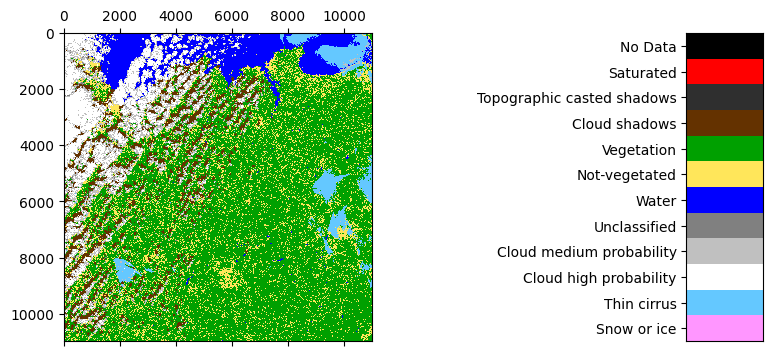

In [9]:
# scene classification of whole tile
vis_scene_classification(ds['scl'].values[0]) # scene classification from product L2A